# RED WINE QUALITY

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

from keras.layers import Dense, Activation, InputLayer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam

import graphviz
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

## Importação do Dataset

In [2]:
wine_dataset = pd.read_csv("wine_dataset.csv")

## Análise dos Dados

In [3]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Tranformação dos Valores de Target

In [6]:
def number_to_category(quality):
    if 3 <= quality <= 4:
        return 'Bad'
    elif 5 <= quality <= 6:
        return 'Medium'
    elif 7 <= quality <= 8:
        return 'Good'

wine_dataset['quality'] = wine_dataset['quality'].apply(number_to_category)

In [7]:
label_encoder = LabelEncoder()

wine_dataset['quality'] = label_encoder.fit_transform(wine_dataset['quality'])

## One-hot Encoding

In [8]:
features, target = wine_dataset.iloc[:, 0:11].values, wine_dataset.iloc[:, 11].values

target_categorical = to_categorical(target)

## Normalização das Features

In [9]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(features)

## Divisão de Treino e Teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_categorical, test_size=0.20, random_state=1, shuffle=True)

print('Shape dados de treino:   %s'% (X_train.shape,))
print('Shape dados de teste:    %s'% (X_test.shape,))
print('Exemplo de entrada:      %s'% (X_train[0]))
print('Exemplo de saída:        %s'% (y_train[0]))

Shape dados de treino:   (1279, 11)
Shape dados de teste:    (320, 11)
Exemplo de entrada:      [-0.57522124 -0.2739726  -0.96       -0.83561644 -0.8196995  -0.8028169
 -0.86572438  0.04698972  0.1496063  -0.59281437 -0.66153846]
Exemplo de saída:        [0. 0. 1.]


# MLP

## Rede

In [11]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(target_categorical.shape[1], activation='softmax')
])

C:\Users\Matheus_SilvadeLima\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,539 (13.82 KB)

 Trainable params: 3,539 (13.82 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8373 - loss: 0.9248 - val_accuracy: 0.8125 - val_loss: 0.6019
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.5758 - val_accuracy: 0.8125 - val_loss: 0.4990
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.4652 - val_accuracy: 0.8125 - val_loss: 0.4698
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.5156 - val_accuracy: 0.8125 - val_loss: 0.4405
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8168 - loss: 0.4767 - val_accuracy: 0.8125 - val_loss: 0.4314
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.4460 - val_accuracy: 0.8477 - val_loss: 0.4242
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8263 - loss: 0.4553 - val_accuracy: 0.8438 - val_loss: 0.4150
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8379 - loss: 0.4115 - val_accuracy: 0.8555 - val_loss:

## Resultados

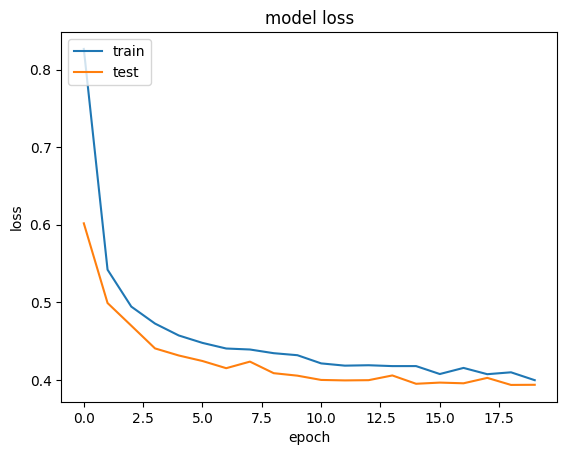

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

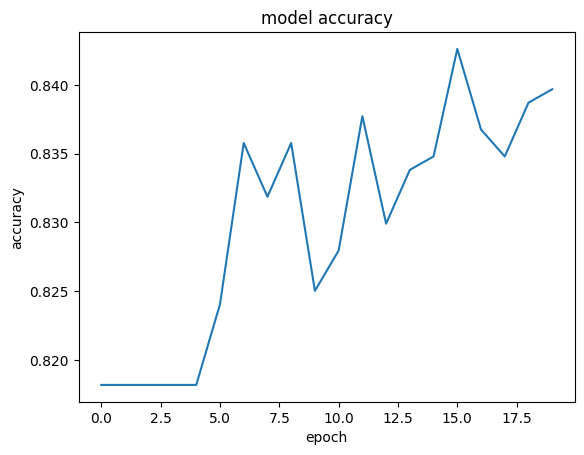

In [15]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Random Forest

In [16]:
# Treino do modelo

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Atribuindo valores para as notas

train_score = rf_model.score(X_train, y_train)
test_score = cross_val_score(rf_model, X_test, y_test, cv=5).mean()

print(f"Random Forest Training Accuracy: {train_score}")
print(f"Random Forest Testing Accuracy: {test_score}")


Random Forest Training Accuracy: 0.9984362783424551
Random Forest Testing Accuracy: 0.8125


In [ ]:
feature_names = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']

X_train_df = pd.DataFrame(X_train, columns=feature_names)

# criando o gráfico com o inicio da arvore de decisão para vermos um exemplo
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_df.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

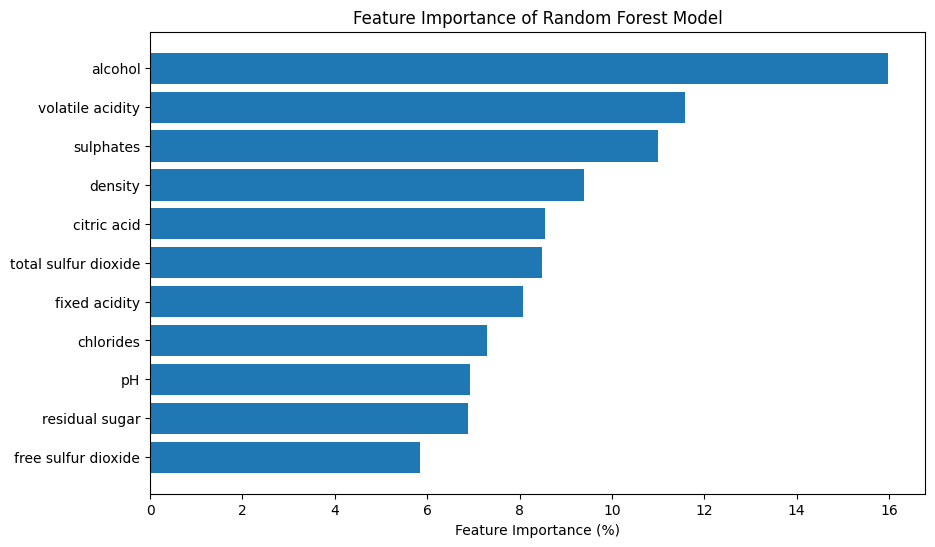

In [18]:
# utilizar a funcão de feature importance do sklearn
feature_importance = rf_model.feature_importances_

# sort dentro das features
sorted_idx = feature_importance.argsort()
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importance[sorted_idx]

# converter para porcentagem
percentages = sorted_importances * 100

# criando o gráfico
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), percentages, align='center')
plt.yticks(range(len(sorted_idx)), sorted_feature_names)
plt.xlabel('Feature Importance (%)')
plt.title('Feature Importance of Random Forest Model')
plt.show()

# K-Means

In [19]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [20]:
wine_dataset[('quality')].unique()
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [21]:
features_to_plot = [3, 8, 9]
feature_names = wine_dataset.columns[features_to_plot]

print('Características selecionadas para plotar:', feature_names)

Características selecionadas para plotar: Index(['residual sugar', 'pH', 'sulphates'], dtype='object')


In [22]:
colours = ['r', 'g', 'b']
assert len(colours) == k

C:\Users\Matheus_SilvadeLima\AppData\Local\Temp\ipykernel_4352\1243742039.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


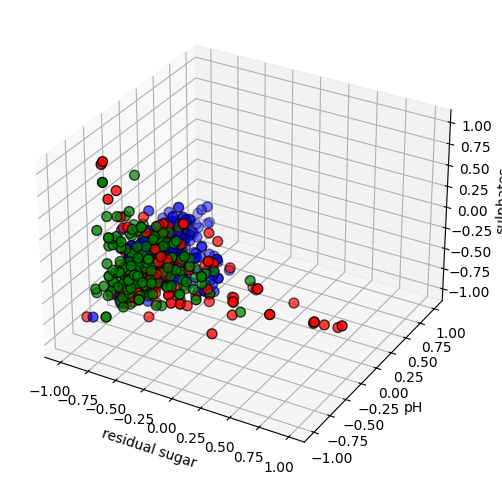

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
_ = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y_colours = np.choose(kmeans.labels_, colours)

ax.scatter(X_train[:, features_to_plot[0]], X_train[:, features_to_plot[1]], X_train[:, features_to_plot[2]], c=y_colours, edgecolor='k', s=50)
ax.scatter(kmeans.cluster_centers_[:, features_to_plot[0]], kmeans.cluster_centers_[:, features_to_plot[1]], kmeans.cluster_centers_[:, features_to_plot[2]], edgecolor='k', s=500, marker=(5, 1), c=colours, depthshade=False)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

fig.show()

C:\Users\Matheus_SilvadeLima\AppData\Local\Temp\ipykernel_4352\3064796549.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


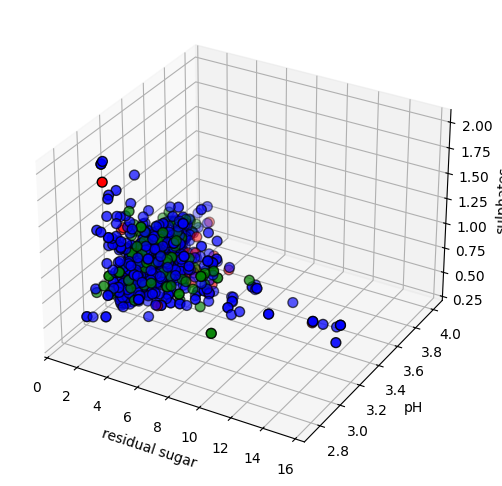

In [24]:
#plotando com as etiquetas verdadeiras
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
_ = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y_colours = np.choose(target, colours)

ax.scatter(features[:, features_to_plot[0]], features[:, features_to_plot[1]], features[:, features_to_plot[2]], c=y_colours, edgecolor='k', s=50)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(features[target == label, 3].mean()-0.3, features[target == label, 0].mean()+1.3, features[target == label, 2].mean(), name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

fig.show()

In [25]:
y_out = kmeans.labels_

wrong = sum([ int(target[i] != y_out[i]) for i in range(min(len(target), len(y_out)))])

print('True labels: %s' % target)
print('k-means labels: %s' % y_out)
print('Wrong classifications: %d (%.2f%%)' % (wrong, wrong/len(target)*100))

True labels: [2 2 2 ... 2 2 2]
k-means labels: [2 1 2 ... 2 2 1]
Wrong classifications: 717 (44.84%)


# AdaBoost

## Código Base

In [26]:
wine_dataset = pd.read_csv("wine_dataset.csv")

def number_to_category(quality):
    if 3 <= quality <= 4:
        return 'Bad'
    elif 5 <= quality <= 6:
        return 'Medium'
    elif 7 <= quality <= 8:
        return 'Good'

wine_dataset['quality'] = wine_dataset['quality'].apply(number_to_category)

label_encoder = LabelEncoder()

wine_dataset['quality'] = label_encoder.fit_transform(wine_dataset['quality'])

features, target = wine_dataset.iloc[:, 0:11].values, wine_dataset.iloc[:, 11].values

scaler = MinMaxScaler(feature_range=(-1,1))

scaled_data = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.20, random_state=1, shuffle=True)

## AdaBoost

In [27]:
base_classifier = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

ada_boost.fit(X_train, y_train)

C:\Users\Matheus_SilvadeLima\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [28]:
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f} %')

Accuracy: 0.78 %
